In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('daily_users.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
def remove_commas(x):
    return float(x.replace(',', ''))
df['Page.Loads'] = df['Page.Loads'].apply(lambda x : remove_commas(x))
df = df[['Date','Page.Loads']]
df.columns = ['ds', 'y']

In [9]:
df.head()

ds       y
0 2014-09-14  2146.0
1 2014-09-15  3621.0
2 2014-09-16  3698.0
3 2014-09-17  3667.0
4 2014-09-18  3316.0

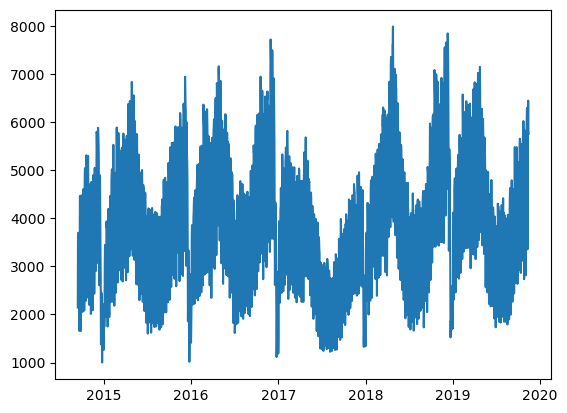

In [10]:
plt.plot(df['ds'], df['y'])
plt.show()

**Simple Moving Average**

Due to its emphasis on long-term trends and capacity to reduce the impact of short-term noise, simple moving average is a good tool for finding abnormalities. The SMA provides a smooth representation of the underlying pattern by calculating the average of data points across a chosen timeframe, which makes it simpler to spot departures from the average.

<Axes: >

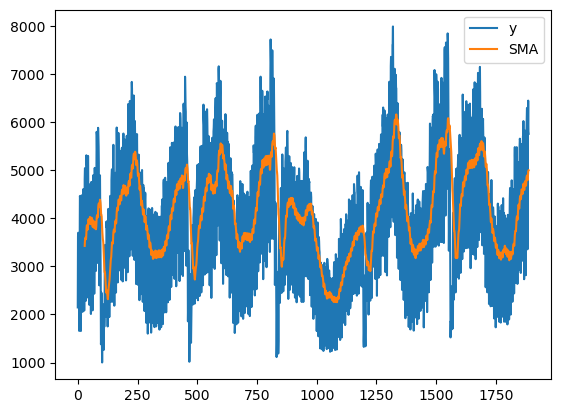

In [11]:
df['SMA'] = df.iloc[:,1].rolling(window=30).mean()
df[['y','SMA']].plot()

Text(0.5, 1.0, 'The distribution of diff in SMA')

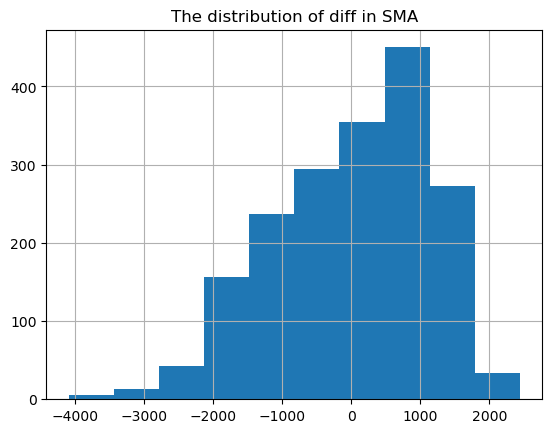

In [12]:
df['diff_SMA'] = df['y'] - df['SMA']
df['diff_SMA'].hist()
plt.title('The distribution of diff in SMA')

In [13]:
df['upper_SMA'] = df['SMA'] + 2000
df['lower_SMA'] = df['SMA'] - 2000
df[30:60]

ds       y          SMA     diff_SMA    upper_SMA    lower_SMA
30 2014-10-14  5040.0  3520.466667  1519.533333  5520.466667  1520.466667
31 2014-10-15  5028.0  3567.366667  1460.633333  5567.366667  1567.366667
32 2014-10-16  4658.0  3599.366667  1058.633333  5599.366667  1599.366667
33 2014-10-17  3624.0  3597.933333    26.066667  5597.933333  1597.933333
34 2014-10-18  2285.0  3563.566667 -1278.566667  5563.566667  1563.566667
35 2014-10-19  3454.0  3584.866667  -130.866667  5584.866667  1584.866667
36 2014-10-20  5307.0  3706.500000  1600.500000  5706.500000  1706.500000
37 2014-10-21  5135.0  3801.400000  1333.600000  5801.400000  1801.400000
38 2014-10-22  5084.0  3849.600000  1234.400000  5849.600000  1849.600000
39 2014-10-23  4650.0  3855.866667   794.133333  5855.866667  1855.866667
40 2014-10-24  3571.0  3827.766667  -256.766667  5827.766667  1827.766667
41 2014-10-25  2354.0  3762.400000 -1408.400000  5762.400000  1762.400000
42 2014-10-26  3497.0  3768.200000  -271.200000  5768.200000  1768.200000
43 2014-10-27  5294.0  3889.466667  1404.533333  5889.466667  1889.466667
44 2014-10-28  4643.0  3962.066667   680.933333  5962.066667  1962.066667
45 2014-10-29  4596.0  3978.733333   617.266667  5978.733333  1978.733333
46 2014-10-30  4162.0  3968.333333   193.666667  5968.333333  1968.333333
47 2014-10-31  2933.0  3928.633333  -995.633333  5928.633333  1928.633333
48 2014-11-01  2202.0  3884.900000 -1682.900000  5884.900000  1884.900000
49 2014-11-02  3083.0  3887.500000  -804.500000  5887.500000  1887.500000
50 2014-11-03  4376.0  3964.900000   411.100000  5964.900000  1964.900000
51 2014-11-04  4704.0  4026.800000   677.200000  6026.800000  2026.800000
52 2014-11-05  4306.0  4020.300000   285.700000  6020.300000  2020.300000
53 2014-11-06  4178.0  4006.133333   171.866667  6006.133333  2006.133333
54 2014-11-07  3236.0  3974.433333  -738.433333  5974.433333  1974.433333
55 2014-11-08  2010.0  3896.666667 -1886.666667  5896.666667  1896.666667
56 2014-11-09  2901.0  3874.533333  -973.533333  5874.533333  1874.533333
57 2014-11-10  4754.0  3963.666667   790.333333  5963.666667  1963.666667
58 2014-11-11  4417.0  4009.866667   407.133333  6009.866667  2009.866667
59 2014-11-12  4535.0  4000.566667   534.433333  6000.566667  2000.566667

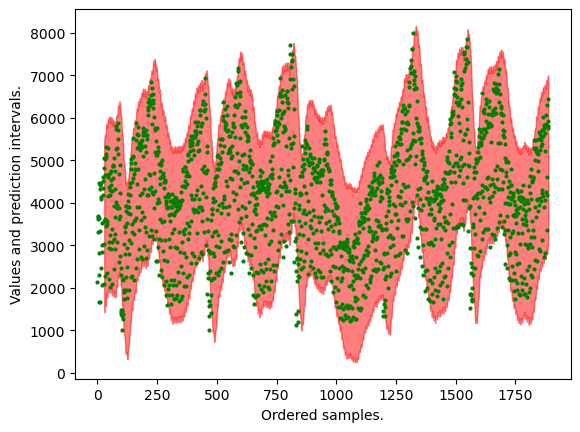

In [14]:
def plot_it():
    plt.plot(df['y'],'go',markersize=2,label='Actual')
    plt.fill_between(
       np.arange(df.shape[0]), df['lower_SMA'], df['upper_SMA'], alpha=0.5, color="r",
       label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    plt.show()
    
plot_it()

**Exponential Smoothing**

Exponential smoothing is particularly sensitive to abrupt shifts or odd patterns in the time series because it can give higher weights to recent data points. Due to its sensitivity, it may efficiently detect and highlight anomalies in the most recent observations.

<Axes: >

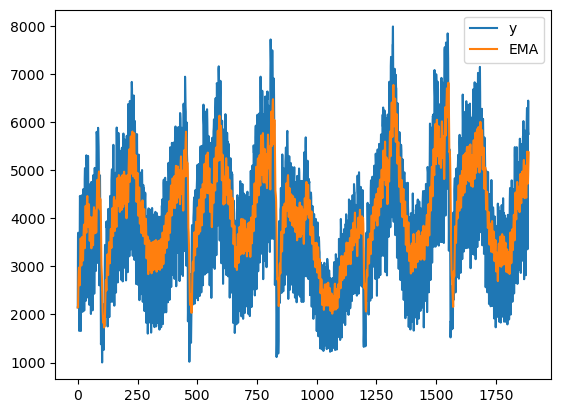

In [19]:
from statsmodels.tsa.api import SimpleExpSmoothing
EMAfit = SimpleExpSmoothing(df['y']).fit(smoothing_level=0.2,optimized=False)
EMA = EMAfit.forecast(3).rename(r'$\alpha=0.2$')
df['EMA'] = EMAfit.predict(start = 0)
df[['y','EMA']].plot()

Text(0.5, 1.0, 'The distribution of diff in EMA')

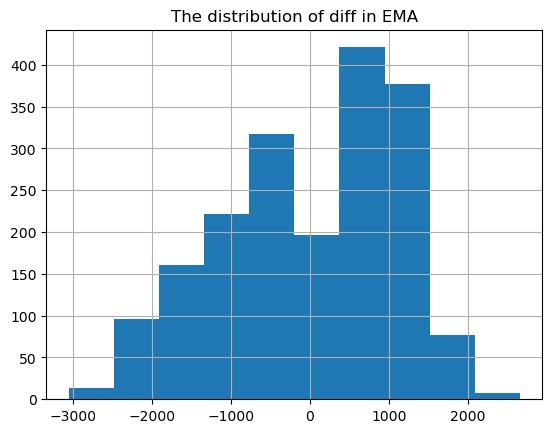

In [20]:
df['diff_EMA'] = df['y'] - df['EMA']
df['diff_EMA'].hist()
plt.title('The distribution of diff in EMA')

In [21]:
df['upper_EMA'] = df['EMA'] + 2000
df['lower_EMA'] = df['EMA'] - 2000
df[30:60]

ds       y          SMA     diff_SMA    upper_SMA    lower_SMA  \
30 2014-10-14  5040.0  3520.466667  1519.533333  5520.466667  1520.466667   
31 2014-10-15  5028.0  3567.366667  1460.633333  5567.366667  1567.366667   
32 2014-10-16  4658.0  3599.366667  1058.633333  5599.366667  1599.366667   
33 2014-10-17  3624.0  3597.933333    26.066667  5597.933333  1597.933333   
34 2014-10-18  2285.0  3563.566667 -1278.566667  5563.566667  1563.566667   
35 2014-10-19  3454.0  3584.866667  -130.866667  5584.866667  1584.866667   
36 2014-10-20  5307.0  3706.500000  1600.500000  5706.500000  1706.500000   
37 2014-10-21  5135.0  3801.400000  1333.600000  5801.400000  1801.400000   
38 2014-10-22  5084.0  3849.600000  1234.400000  5849.600000  1849.600000   
39 2014-10-23  4650.0  3855.866667   794.133333  5855.866667  1855.866667   
40 2014-10-24  3571.0  3827.766667  -256.766667  5827.766667  1827.766667   
41 2014-10-25  2354.0  3762.400000 -1408.400000  5762.400000  1762.400000   
42 2014-10-26  3497.0  3768.200000  -271.200000  5768.200000  1768.200000   
43 2014-10-27  5294.0  3889.466667  1404.533333  5889.466667  1889.466667   
44 2014-10-28  4643.0  3962.066667   680.933333  5962.066667  1962.066667   
45 2014-10-29  4596.0  3978.733333   617.266667  5978.733333  1978.733333   
46 2014-10-30  4162.0  3968.333333   193.666667  5968.333333  1968.333333   
47 2014-10-31  2933.0  3928.633333  -995.633333  5928.633333  1928.633333   
48 2014-11-01  2202.0  3884.900000 -1682.900000  5884.900000  1884.900000   
49 2014-11-02  3083.0  3887.500000  -804.500000  5887.500000  1887.500000   
50 2014-11-03  4376.0  3964.900000   411.100000  5964.900000  1964.900000   
51 2014-11-04  4704.0  4026.800000   677.200000  6026.800000  2026.800000   
52 2014-11-05  4306.0  4020.300000   285.700000  6020.300000  2020.300000   
53 2014-11-06  4178.0  4006.133333   171.866667  6006.133333  2006.133333   
54 2014-11-07  3236.0  3974.433333  -738.433333  5974.433333  1974.433333   
55 2014-11-08  2010.0  3896.666667 -1886.666667  5896.666667  1896.666667   
56 2014-11-09  2901.0  3874.533333  -973.533333  5874.533333  1874.533333   
57 2014-11-10  4754.0  3963.666667   790.333333  5963.666667  1963.666667   
58 2014-11-11  4417.0  4009.866667   407.133333  6009.866667  2009.866667   
59 2014-11-12  4535.0  4000.566667   534.433333  6000.566667  2000.566667   

            EMA     diff_EMA    upper_EMA    lower_EMA  
30  3662.944821  1377.055179  5662.944821  1662.944821  
31  3938.355857  1089.644143  5938.355857  1938.355857  
32  4156.284685   501.715315  6156.284685  2156.284685  
33  4256.627748  -632.627748  6256.627748  2256.627748  
34  4130.102199 -1845.102199  6130.102199  2130.102199  
35  3761.081759  -307.081759  5761.081759  1761.081759  
36  3699.665407  1607.334593  5699.665407  1699.665407  
37  4021.132326  1113.867674  6021.132326  2021.132326  
38  4243.905861   840.094139  6243.905861  2243.905861  
39  4411.924688   238.075312  6411.924688  2411.924688  
40  4459.539751  -888.539751  6459.539751  2459.539751  
41  4281.831801 -1927.831801  6281.831801  2281.831801  
42  3896.265440  -399.265440  5896.265440  1896.265440  
43  3816.412352  1477.587648  5816.412352  1816.412352  
44  4111.929882   531.070118  6111.929882  2111.929882  
45  4218.143906   377.856094  6218.143906  2218.143906  
46  4293.715124  -131.715124  6293.715124  2293.715124  
47  4267.372100 -1334.372100  6267.372100  2267.372100  
48  4000.497680 -1798.497680  6000.497680  2000.497680  
49  3640.798144  -557.798144  5640.798144  1640.798144  
50  3529.238515   846.761485  5529.238515  1529.238515  
51  3698.590812  1005.409188  5698.590812  1698.590812  
52  3899.672650   406.327350  5899.672650  1899.672650  
53  3980.938120   197.061880  5980.938120  1980.938120  
54  4020.350496  -784.350496  6020.350496  2020.350496  
55  3863.480397 -1853.480397  5863.480397  1863.480397  
56  3492.784317  -591.784317  5492.784317  1492.784317  
57  3374.427454  1379.57254

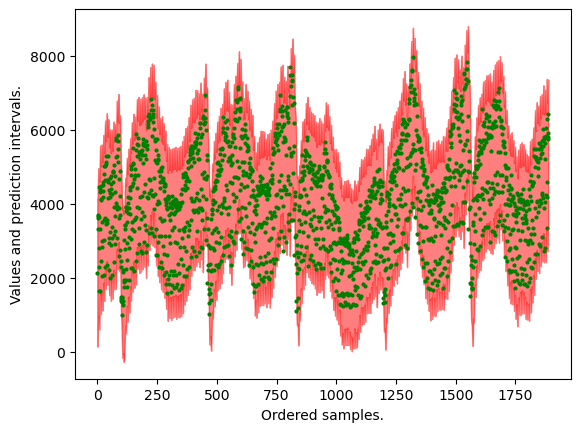

In [22]:
def plot_it():
    plt.plot(df['y'],'go',markersize=2,label='Actual')
    plt.fill_between(
       np.arange(df.shape[0]), df['lower_EMA'], df['upper_EMA'], alpha=0.5, color="r",
       label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    plt.show()
    
plot_it()

**Seasonal-Trend Decomposition (STD)**

Time series anomalies are divided into their seasonal, trend, and residual components using the Seasonal-Trend Decomposition (STD) method. Using STD, we can efficiently separate the seasonal and trend components, allowing for a more in-depth analysis of the residual component. The variances from the anticipated seasonal and trend patterns are represented by the residual component.

<Axes: xlabel='ds'>

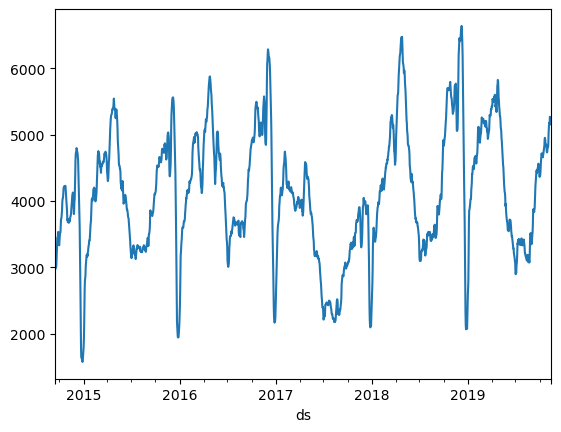

In [24]:
import statsmodels.api as sm

df = pd.read_csv('daily_users.csv')
df['Date'] = pd.to_datetime(df['Date'])
def remove_commas(x):
    return float(x.replace(',', ''))
df['Page.Loads'] = df['Page.Loads'].apply(lambda x : remove_commas(x))
df = df[['Date','Page.Loads']]
df.columns = ['ds', 'y']
df = df.reset_index(drop='index')
df.index = pd.to_datetime(df['ds'])

result = sm.tsa.seasonal_decompose(df['y'], model='additive')
result.trend[1:2000].plot()

<Axes: xlabel='ds'>

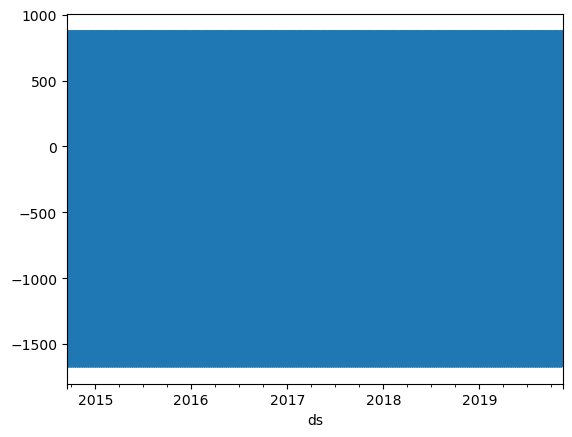

In [25]:
result.seasonal[1:2000].plot()

<Axes: xlabel='ds'>

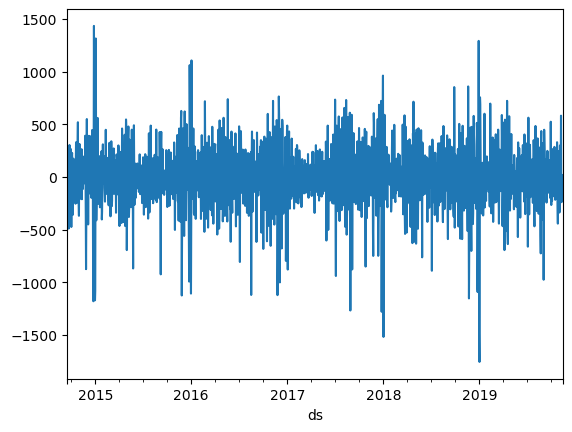

In [26]:
result.resid[1:2000].plot()

**Prophet**

Prophet is unique in its capacity to take into consideration the impacts of seasonality, trends, and holidays on time series data. Prophet uses a Bayesian technique that effectively handles gaps in the dataset, including missing values, in contrast to simple moving average and seasonal-trend decomposition. In order to accurately capture and detect abnormalities or irregularities in the data, it establishes the uncertainty interval around the predicted values.

In [31]:
from prophet import Prophet
import plotly.offline as py

py.init_notebook_mode()
%matplotlib inline

# Fitting with default parameters
df_model_0 = Prophet(daily_seasonality=True)
df_model_0.fit(df)

17:20:01 - cmdstanpy - INFO - Chain [1] start processing
17:20:02 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future= df_model_0.make_future_dataframe(periods=30, freq='d')
future.tail()

ds
1913 2019-12-10
1914 2019-12-11
1915 2019-12-12
1916 2019-12-13
1917 2019-12-14

In [33]:
df_model_0_data=df_model_0.predict(future)
df_model_0_data.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
1913 2019-12-10  3258.772725  5421.612533  6560.531463  3253.930773   
1914 2019-12-11  3257.494583  5189.588135  6371.356797  3252.186378   
1915 2019-12-12  3256.216441  4791.064087  5919.488210  3249.953648   
1916 2019-12-13  3254.938299  3656.243416  4839.297617  3247.944694   
1917 2019-12-14  3253.660156  2280.410446  3371.776619  3246.106652   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
1913  3266.291092     2713.316439           2713.316439           2713.316439   
1914  3265.849251     2522.117061           2522.117061           2522.117061   
1915  3265.214083     2112.103422           2112.103422           2112.103422   
1916  3264.382209      999.988326            999.988326            999.988326   
1917  3264.618145     -426.236043           -426.236043           -426.236043   

           daily  ...       weekly  weekly_lower  weekly_upper      yearly  \
1913  896.290227  ...   877.557602    877.557602    877.557602  939.468610   
1914  896.290227  ...   813.967779    813.967779    813.967779  811.859055   
1915  896.290227  ...   545.708316    545.708316    545.708316  670.104879   
1916  896.290227  ...  -412.239250   -412.239250   -412.239250  515.937349   
1917  896.290227  ... -1673.883060  -1673.883060  -1673.883060  351.356790   

      yearly_lower  yearly_upper  multiplicative_terms  \
1913    939.468610    939.468610                   0.0   
1914    811.859055    811.859055                   0.0   
1915    670.104879    670.104879                   0.0   
1916    515.937349    515.937349                   0.0   
1917    351.356790    351.356790                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper         yhat  
1913                         0.0                         0.0  5972.089164  
1914                         0.0                         0.0  5779.611645  
1915                         0.0                         0.0  5368.319863  
1916                         0.0                         0.0  4254.926625  
1917                         0.0                         0.0  2827.424114  

[5 rows x 22 columns]

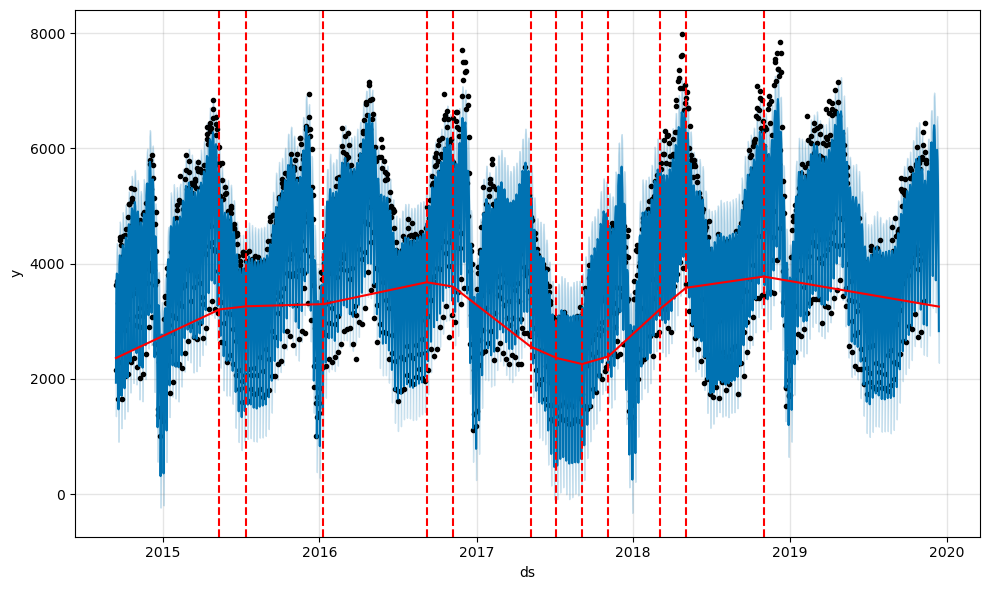

In [34]:
from prophet.plot import add_changepoints_to_plot

fig= df_model_0.plot(df_model_0_data)
a = add_changepoints_to_plot(fig.gca(), df_model_0, df_model_0_data)

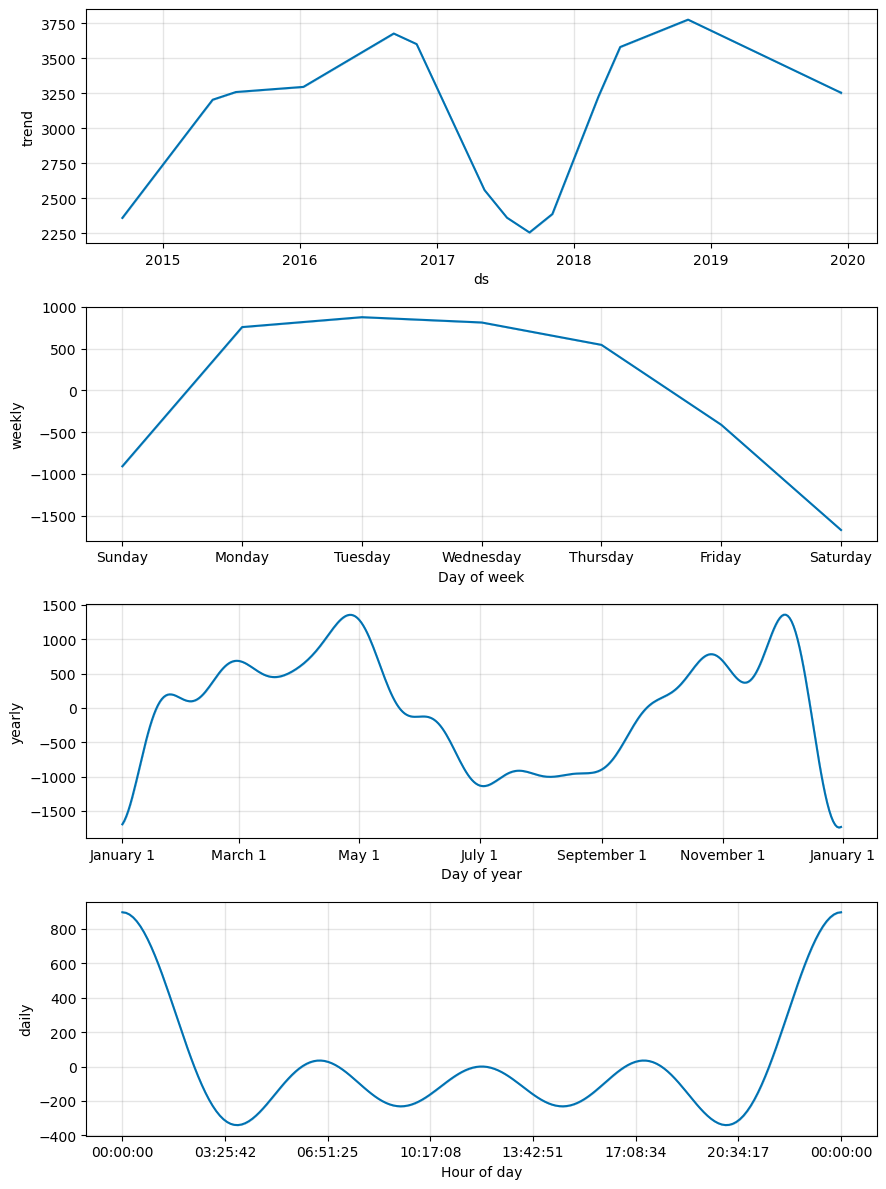

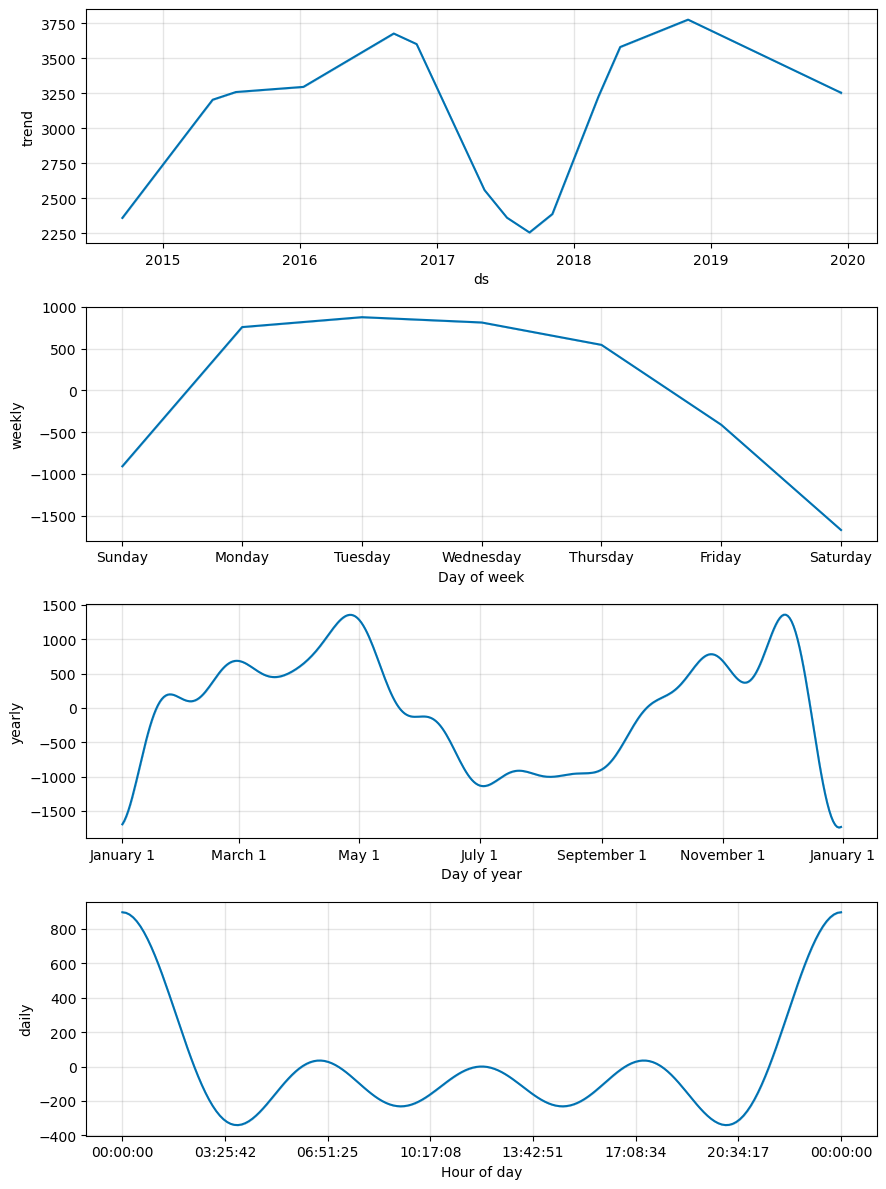

In [35]:
df_model_0.plot_components(df_model_0_data)